# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime) # setup task to provide feedback to 
# agent and set goal
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act() # each loop get 4 rotor speeds
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

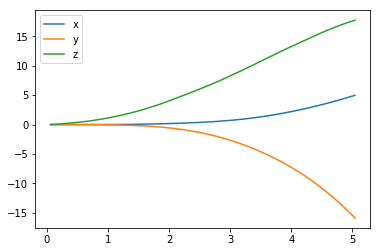

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

## so basically kept running the episode until the time limit. running the episode means that state of the
## quadcopter kept on changing with actions (4 rotor speeds provided by the agent)

The next code cell visualizes the velocity of the quadcopter.

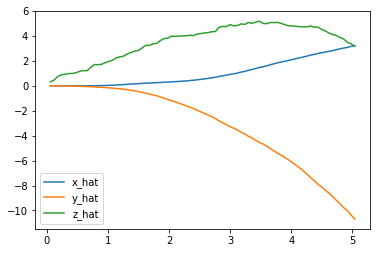

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

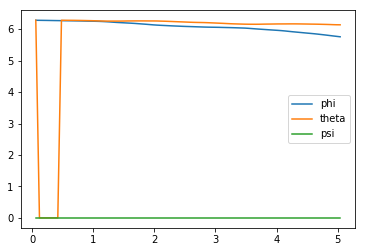

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

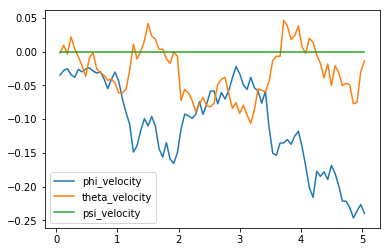

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

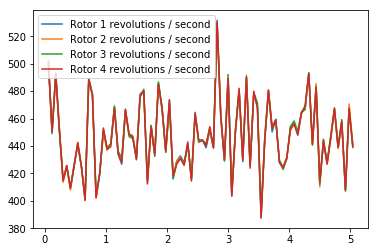

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  4.97517193 -15.86910601  17.73356795   5.75734146   6.13814453   0.        ]
[  3.22474062 -10.67551371   3.16488347]
[-0.23944248 -0.01391543  0.        ]


In the sample task in `task.py`, we use the **6-dimensional pose of the quadcopter to construct the state of the environment at each timestep**.  However, when amending the task for your purposes, **you are welcome to expand the size of the state vector by including the velocity information.**  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [17]:
%reload_ext autoreload
%autoreload 2
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000 #1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

score_store = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    # [  0.   0.  0.   0.   0.   0.   0.   0.  0.   0.   0.   0.   0.   0.  0.
    # 0.   0.   0.]
    #print(state)
    #print('******')
    while True:         # this while loop runs a single episode until time limit or bounds!
        action = agent.act(state) # gives array with 4 values of rotor speed
                                  # each value is some weighted linear combination of state features
        next_state, reward, done = task.step(action)
        agent.step(reward, done) # agent learns
        state = next_state
        if done:
            score_store.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
        # at the end of the episode either new weights are kept or the weights are perturbed via noise scale
        # learning at the end of the episode is just weight updates!!
    sys.stdout.flush()

#print(agent.best_w)
#print('*******')
#print(state)

'''given a policy, action is calculated and state is evolved. this keeps on going until the end of the episode when score is
 calculated. Then learning happens and policy/ policy weights are updated via random noise. Then another episode is played 
 out with the new policy/weights where action is calculated and state is evolved. The goal is that eventually we'll reach a
 OPTIMUM policy/weights, if with which actions are taken/calculated (state is accordingly evolved) in an episode 
 will lead to best score.'''

Episode = 1000, score =  -0.691 (best =   0.136), noise_scale = 3.255

"given a policy, action is calculated and state is evolved. this keeps on going until the end of the episode when score is\n calculated. Then learning happens and policy/ policy weights are updated via random noise. Then another episode is played \n out with the new policy/weights where action is calculated and state is evolved. The goal is that eventually we'll reach a\n OPTIMUM policy/weights, if with which actions are taken/calculated (state is accordingly evolved) in an episode \n will lead to best score."

Text(0.5,1,'score evolution with episodes')

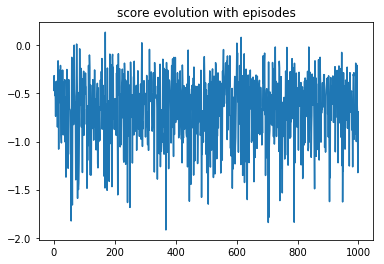

In [18]:
plt.plot(score_store)
plt.title('score evolution with episodes')

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, **you may like to teach your quadcopter to takeoff**, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  **You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.**

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

Text(0.5,1,'evolution of reward in last episode')

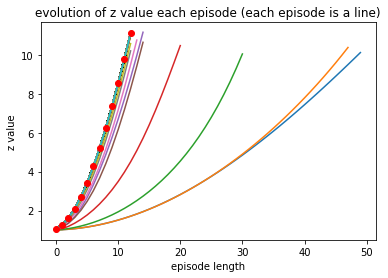

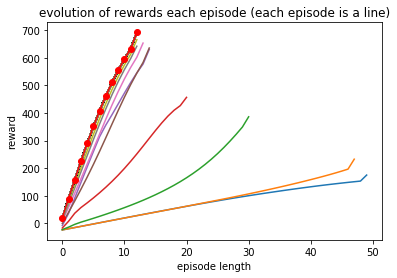

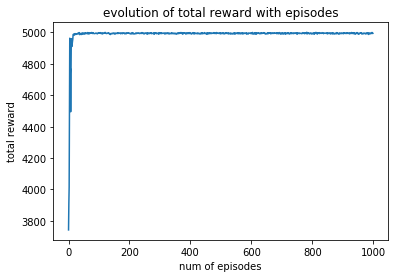

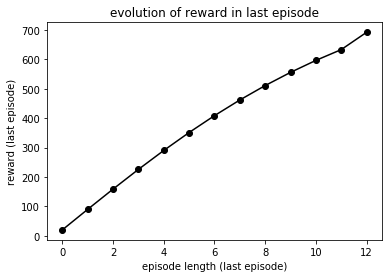

In [20]:
%reload_ext autoreload
%autoreload 2

import sys
import pandas as pd
from agents.agent import DDPG
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode (changed)
init_pose = np.array([1., 1., 1., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([1., 1., 10.])             # target pose (take off)

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos) 
num_episodes = 1000
agent = DDPG(task) 


total_reward_per_episode = []
#target_reached = False

for i_episode in range(1, num_episodes+1):
    
    state = agent.reset_episode()
    sum_rewards = 0
    pose_store_z = []
    rewards_per_episode = []

    while True:     
        if task.sim.pose[2] > target_pos[2]: # stopping early, since i am considering "crossing" z = 10 as take off.
            
            total_reward_per_episode.append(sum_rewards)

            plt.figure(1)
            plt.plot(pose_store_z)
            
            plt.figure(2)
            plt.plot(rewards_per_episode)
        #    target_reached = True
            break
        
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        sum_rewards += reward
        
        agent.step(action,reward,next_state,done) # agent learns
        state = next_state
        
        pose_store_z.append(task.sim.pose[2])
        rewards_per_episode.append(reward)
        
        if done:
            
            total_reward_per_episode.append(sum_rewards)

            plt.figure(1)
            plt.plot(pose_store_z)
            
            plt.figure(2)
            plt.plot(rewards_per_episode)
            break

    sys.stdout.flush()
    #if target_reached:
    #    break

plt.figure(1)
plt.plot(pose_store_z,'ro') # plots the y values in the last episode
plt.xlabel('episode length')
plt.ylabel('z value')
plt.title('evolution of z value each episode (each episode is a line)')
#plt.show()

plt.figure(2)
plt.plot(rewards_per_episode,'-ro')
plt.xlabel('episode length')
plt.ylabel('reward') #in last episode, dotted line above
plt.title('evolution of rewards each episode (each episode is a line)')
#plt.show()

plt.figure(3)
plt.plot(total_reward_per_episode)
plt.xlabel('num of episodes')
plt.ylabel('total reward')
plt.title('evolution of total reward with episodes')

plt.figure(4)
plt.plot(rewards_per_episode,'-ko')
plt.xlabel('episode length (last episode)')
plt.ylabel('reward (last episode)') #in last episode, dotted line above
plt.title('evolution of reward in last episode')


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

Text(0.5,1,'last 350 episodes')

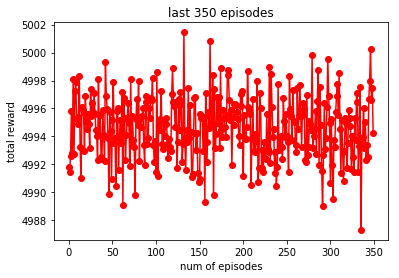

In [21]:
## TODO: Plot the rewards.
# other figures already plotted above!
plt.figure(3)
plt.plot(total_reward_per_episode[-350:], '-ro')
plt.xlabel('num of episodes')
plt.ylabel('total reward')
plt.title('last 350 episodes')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: 
- I specified my task as takeoff. I considered takeoff as "crossing" the z = 10 value and designed my reward function.

**(UPDATED BASED ON REVIEW FEEDBACK!)**
- the new psuedo code is

        if z position (is more than or equal to) z = 10
            bonus = give 10 bonus points for "crossing"
        else:
            bonus = 0

        if velocity_z (velocity in z direction) > 0
            z_vel_bonus = 10*velocity_z
        else:
            z_vel_bonus = -10

        reward = -(abs(z - target_z))+ bonus + z_vel_bonus
        
        # this function gives rewards to increase the z value, then bonus for crossing over z = 10 and increasing the velocity in z direction more than 0
        

**(INITIAL CODE!)**
- the psuedo code and explanation for the reward function is 

        if z position (is more than or equal to) z = 10
            bonus = give 100 bonus points for "crossing"
            time_penalty = add time penalty to avoid extending episodes
        else:
            bonus = no bonus points
            time_penalty = no time penalty to avoid crashing to z = 0
            
        reward =  (1.- abs(z - target_z)/target_z) + bonus - time_penalty
        
        # this function gives small rewards to increase the z value, then big bonus for crossing over z = 10 and penalizes time expenditure in the episodes after crossing over z = 10
        


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I tried the DDPG algorithm. However, I did not use the size suggested in the DDPG paper as it was taking long time to run the simulation on my laptop. Hence, I added in an extra layer compared to DDPG paper and reduced the number of units from 400 or 300 to max of 256 with other layers with 128 units.


- I choose learning rate as 0.001. choosing lower learning rate value than this value seemed to slow the exploration process and chances of getting stuck in local minima (crash and finish simulation soon) increases. I choose gamma as 0.99 similar to the DDPG paper to prefer future rewards and soft_update parameter (tau) update  of the weights at 0.001 (similar to DDPG) to cause more softer/stable updates to the weights. Also changed the OUnoise sigma to 0.3 to induce slighlty more 'volatility' when exploring via adding noise to the actions (rotor speeds)


- my actor NN was 128 units dense layer (with L2 regularization) followed by 256 and 128 units dense layer layer, all with 'relu' activation function (total 3 layers). for my critic NN, I choose 256 (L2 regularization) and 128 unit dense layer for both state and action pathway (2 layers each), along with 'relu' activation function.

**(UPDATED THE actor.py NETWORK BASED ON REVIEW FEEDBACK)**

- updated learning rate (lr) in critic.py and actor.py network to 0.0001 instead of 0.001
- added kernel initializer

      raw_actions = layers.Dense(units=self.action_size, activation='sigmoid',
         name='raw_actions',kernel_initializer= initializers.RandomUniform(minval=-0.0003, maxval=0.0003, seed=None))(net)


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- Hard. I choose takeoff as the task, The main problem is that if a particular position is choosen as a target, then it is intutive to think that, you would need to penalize moving over the target, however, it then cause inverse parabola shaped z-value trajectories suggesting take-off, getting to target position and then crashing slowly back to z = 0 as it (agent) seems to find it better to collect rewards again through the episodes going back to zero after getting the 'target position attainment' bonus. This could possibly be fixed by penalizing runtime, however, harsh penalizing leads to just crashing soon to avoid penalties and avoid exploration.


- I added in bonus for all the z-values above 10, hence considering takeoff as "passing/crossing" z = 10 and adjusted the reward function in task.py accordingly, this did lead to quadcopter take off with high reward values.


- Performance seems to be good (see plots above), as high rewards are obtained for crossing across the z = 10 value.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: 
- Hardest part for me was realizing that the content covered in the later videos of the Reinforcement learning module was much more relevant for this project as compared to earlier videos of the module. I spent extensive time in the earlier part of the module and the later part seemed like getting the viewer familiar with the newer advancements. Hence when I started the project, I was completely thinking in terms of the earlier module lectures and felt completely lost when I started the project. It was only after going through the slack channel I realized the importance of the DDPG code provided.


- The tug-of-war of penalties and rewards on exploration. harsher penalties leads to agent prefering to crashdown sooner and not trying to explore the state space. less harsher penalties can leads to unexpected behaviour of quadcopter not reaching the target (taking off), but rather going back to z=0 after coming close to target along with extending the episode in order to maximize the reward ('flipped' parabola).